In [4]:
#

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [6]:
df['date']= pd.to_datetime(df['date'])

In [9]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline

# DataframeSelector

In [11]:
# Custom Tranformer that extract columns passed as argument to its constructor

class DataFrameSelector(BaseEstimator, TransformerMixin):
    # Class constructor
    def __init__(self, feature_names):
        self._feature_names= feature_names
    
    # Return self nothing else to do 
    def fit(self, X, y=None):
        return self
    # Method that describes what we need this transformer to do 
    def transform(self, X, y=None):
        return X[self._feature_names]

# Categorical Pipeline

In [12]:
# Custom tranformer that breaks dates column into year, month and day into seperate columns and
# converts certain features to binary

class CategoricalTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes in a list of values as its argument
    def __init__(self, use_dates=['year','month','day']):
        self._use_dates= use_dates
        
    # Return self nothing else to do here
    
    def fit(self, X, y=None):
        return self
    
    # Helper function to extract ''year'' from column 'dates'
    
    def get_year(self,obj):
        return str(obj)[:4]
    
    # Helper function to extract ''month'' from column 'dates'
    
    def get_month(self, obj):
        return str(obj)[5:7]
    
    # Helper function to extract 'day' from column 'dates'
    def get_day( self, obj):
        return str(obj)[8:10]
    
    # Helper function that convert values to Binary depending on input
    def create_binary(self, obj):
        if obj==0:
            return 'No'
        else:
            return 'Yes'
    
    # Transformer method we  wrote for this tranformer
    def transform( self, X, y=None):
        for spec in self._use_dates:
            exec("X.loc[:,'{}']=X['date'].apply(self.get_{})".format(spec,spec))
        # Drop unusable column
        X=X.drop('date',axis=1)
        
        # Convert these columns to binary for oneHotEncoder later
        X.loc[:,'waterfront']=X['waterfront'].apply(self.create_binary)
        X.loc[:,'view']=X['view'].apply(self.create_binary)
        X.loc[:,'yr_renovated']=X['yr_renovated'].apply(self.create_binary)
        # Returning numpy array
        return X.values
    

In [13]:
# Roughly Testing categorical Tranformation-----its just for Testing purpose

#  Categorical features to pass down the categorical pipeline

cat_feat=['date','waterfront','view','yr_renovated']
# Defining the steps in the categorical pipeline
categorical_pipeline= Pipeline(steps=[('cat_selector', DataFrameSelector(cat_feat)),
                                     ('cat_transformer',CategoricalTransformer()),
                                     ('one_hot_encoder',OneHotEncoder(sparse=False))])

housing_tr = categorical_pipeline.fit_transform(df)
housing_tr


C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

# Numerical Pipeline

In [14]:
# Custom transformer we wrote to enigeer features (bathrooms per bedroom and/ or how old the house is in 2019)

#Custom transformer we wrote to engineer features ( bathrooms per bedroom and/or how old the house is in 2019  ) 
#passed as boolen arguements to its constructor
class NumericalTransformer(BaseEstimator, TransformerMixin):
    #Class Constructor
    def __init__( self, bath_per_bed = True, years_old = True ):
        self._bath_per_bed = bath_per_bed
        self._years_old = years_old
        
    #Return self, nothing else to do here
    def fit( self, X, y = None ):
        return self 
    
    #Custom transform method we wrote that creates aformentioned features and drops redundant ones 
    def transform(self, X, y = None):
        #Check if needed 
        if self._bath_per_bed:
            #create new column
            X.loc[:,'bath_per_bed'] = X['bathrooms'] / X['bedrooms']
            #drop redundant column(())
            X.drop('bathrooms', axis = 1 )
        #Check if needed     
        if self._years_old:
            #create new column
            X.loc[:,'years_old'] =  2019 - X['yr_built']
            #drop redundant column 
            X.drop('yr_built', axis = 1)
            
        #Converting any infinity values in the dataset to Nan
        X = X.replace([ np.inf, -np.inf ], np.nan )
        #returns a numpy array
        return X.values


In [15]:
# att_adder= NumericalTransformer()
# housing_ext= att_adder.fit_transform(df)

In [16]:
# Rogh--Only for Testing Purpose to weather its converting all 
# Numerical features to pass down the numerical pipline
num_feat=['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors',
                'condition', 'grade', 'sqft_basement', 'yr_built']

# Defining the steps in the numerical pipeline

numerical_pipline= Pipeline(steps=[('num_selector',DataFrameSelector(num_feat)),
                                   ('num_transformer',NumericalTransformer()),
                                   ('imputer', SimpleImputer(strategy='median')),
                                   ('std_scaler',StandardScaler())])

housing_tr1 = numerical_pipline.fit_transform(df)
housing_tr1

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


array([[-0.40290302, -1.45107268, -0.98065209, ..., -0.54467809,
        -1.45353889,  0.54467809],
       [-0.40290302,  0.17448579,  0.53336915, ..., -0.68085037,
         0.51515534,  0.68085037],
       [-1.48249316, -1.45107268, -1.4272339 , ..., -1.29362563,
        -0.6660612 ,  1.29362563],
       ...,
       [-1.48249316, -1.77618438, -1.15492792, ...,  1.29364769,
        -1.25666946, -1.29364769],
       [-0.40290302,  0.49959749, -0.52317805, ...,  1.12343234,
         0.90889418, -1.12343234],
       [-1.48249316, -1.77618438, -1.15492792, ...,  1.25960462,
        -1.25666946, -1.25960462]])

# Combining the pipelines together

In [17]:
# Categorical features to pass down the categorical pipeline

cat_feat=['date','waterfront','view','yr_renovated']

# Numerical features to pass down the numerical pipline
num_feat=['bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors',
                'condition', 'grade', 'sqft_basement', 'yr_built']

# Defining the steps in the categorical pipeline
categorical_pipeline= Pipeline(steps=[('cat_selector', DataFrameSelector(cat_feat)),
                                     ('cat_transformer',CategoricalTransformer()),
                                     ('one_hot_encoder',OneHotEncoder(sparse=False))])

# Defining the steps in the numerical pipeline

numerical_pipline= Pipeline(steps=[('num_selector',DataFrameSelector(num_feat)),
                                   ('num_transformer',NumericalTransformer()),
                                   ('imputer', SimpleImputer(strategy='median')),
                                   ('std_scaler',StandardScaler())])


# Combining nemerical and categorical pipeline into one full big pipeline
full_pipeline= FeatureUnion(transformer_list=[('categorical_pipeline',categorical_pipeline),
                                             ('numerical_pipeline', numerical_pipline)])


## Now Applying Machine Learning Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= df.drop('price', axis=1)
y=df['price']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

# Full pipeline for model

full_pipeline_m= Pipeline(steps=[('full_pipeline', full_pipeline),
                                ('model', LinearRegression())])

# Fitting the model
full_pipeline_m.fit(X_train, y_train)

# predicting 

y_pred= full_pipeline_m.predict(X_test)


C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [19]:
# Model Accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score

# mean_absolute_error(y_test, y_pred)
# mean_squared_error(y_test, y_pred)
accuracy_score(y_test, y_pred)


0.0

In [20]:
data1={'y_test':y_test,'y_pred':y_pred}
pred_df= pd.DataFrame(data1, columns=['y_test','y_pred'])
pred_df=pred_df.reset_index(drop=True)

In [21]:
pred_df

,y_test,y_pred
0,132500.0,144048.0
1,415000.0,309520.0
2,494000.0,321568.0
3,355000.0,321680.0
4,606000.0,367568.0
...,...,...
4315,175000.0,225696.0
4316,394950.0,512016.0
4317,437000.0,513040.0
4318,293000.0,388544.0


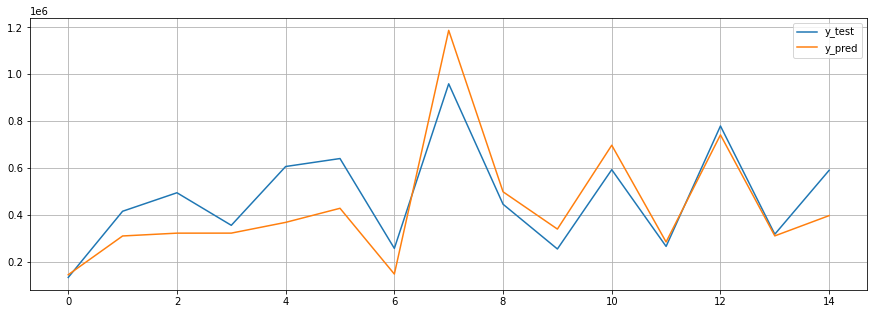

In [25]:
pred_df[:15].plot(figsize=(15,5))
plt.grid(True)